# Trabajo Práctico 2


## Integrantes:


*   Arelis Picado
*   Diego Solis
*   Isaac Vargas

## Sección I
{(30 puntos) Implementación del algoritmo Bilinear para el aumentado de tamaño de una imagen}

Para una imagen $U \in \mathbb{R}^{n \times m}$, frecuentemente necesitamos crear una imagen nueva de mayor tamaño $U' \in \mathbb{R}^{n' \times m'}$, donde $n' = \alpha n$ y $m' = \alpha m$, con $\alpha \in \mathbb{N}$ un escalar de aumento de la imagen (por lo que entonces $\alpha > 1$). Tomemos la ilustración de la siguiente matriz de ejemplo:

\[
U = \begin{bmatrix}
1 & 5 & 7 \\
3 & 1 & 2 \\
2 & 1 & 5
\end{bmatrix}
\]

Suponiendo un $\alpha = 2$ para el aumento de tamaño, tendríamos como resultado una matriz $U' \in \mathbb{R}^{6 \times 6}$, donde conocemos la mitad de los valores de los píxeles:

\[
U' = \begin{bmatrix}
1 & ? & 5 & ? & 7 & ? \\
? & ? & ? & ? & ? & ? \\
3 & ? & 1 & ? & 2 & ? \\
? & ? & ? & ? & ? & ? \\
2 & ? & 1 & ? & 5 & ? \\
? & ? & ? & ? & ? & ?
\end{bmatrix}
\]

¿Cómo podemos estimar los valores faltantes (con signo de pregunta) con estimaciones adecuadas? Existen muchos algoritmos para hacerlo, a estos algoritmos se les llama \textbf{algoritmos de interpolación}. La Figura \ref{fig:Tipos-de-interpolación} muestra varios algoritmos de interpolación tanto para señales 1D como para 2D.

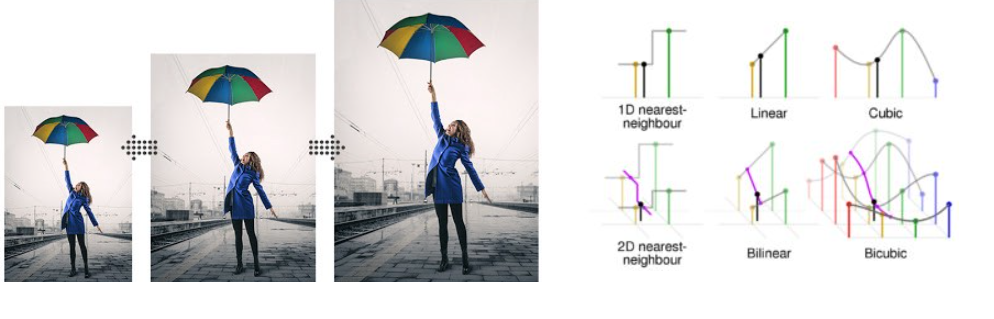

La interpolación bilineal se puede implementar con distintas variantes. La Figura \ref{fig:Diagrama-ilustrativo-de} muestra la que se propone implementar, donde se toman solamente 3 puntos para calcular la ecuación del plano. En tal figura, los puntos negros son valores nulos por estimar o ya estimados, los azules son conocidos de la imagen original y el naranja representa el punto que actualmente se está por estimar. Los valores $x_i$ y $y_i$ son las coordenadas de los píxeles y el valor $z_i$ la intensidad de gris, de modo que el plano puede modelarse como $z_i = f(x_i, y_i)$.

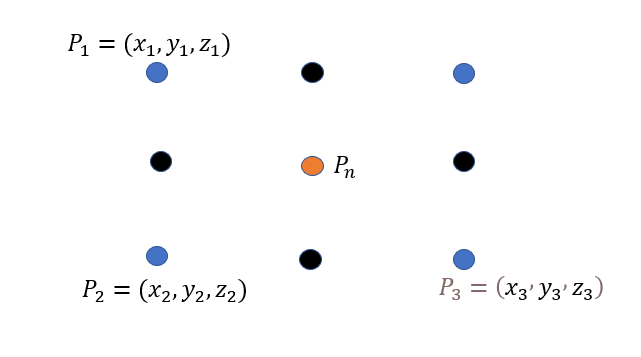

*   Defina cómo estimar el punto naranja $P_n$ suponiendo que interpola un plano que pase por los puntos $P_1$, $P_2$ y $P_3$. Muestre las ecuaciones y pasos intermedios para llegar allí. Exprese el sistema de ecuaciones de forma matricial.
*   Implemente tal método para cambiar el tamaño de una imagen.
*   Pruébelo con una imagen de su preferencia con resolución de $1024 \times 768$ y muestre los resultados:

  *   $\alpha = 2$
  *   $\alpha = 3$

### 1. Definición y formulación para estimar el punto $ P_n $:

**Dado:**
- Tres puntos $ P_1 = (x_1, y_1, z_1), P_2 = (x_2, y_2, z_2), P_3 = (x_3, y_3, z_3) $ conocidos.
- Un punto $ P_n = (x_n, y_n, z_n) $ cuyo valor $ z_n $ deseamos interpolar.

**Ecuación del plano:**

Un plano en el espacio tridimensional puede expresarse como:

$ z = a x + b y + c $

Donde $ a $, $ b $ y $ c $ son los coeficientes del plano. Para encontrar estos coeficientes, necesitamos resolver el siguiente sistema de ecuaciones utilizando los puntos $ P_1 $, $ P_2 $ y $ P_3 $:

$$
z_1 = a x_1 + b y_1 + c
$$
$$
z_2 = a x_2 + b y_2 + c
$$
$$
z_3 = a x_3 + b y_3 + c
$$

Esto se puede expresar en forma matricial como:

$$
\begin{pmatrix}
x_1 & y_1 & 1 \\
x_2 & y_2 & 1 \\
x_3 & y_3 & 1
\end{pmatrix}

\begin{pmatrix}
a \\
b \\
c
\end{pmatrix}

=

\begin{pmatrix}
z_1 \\
z_2 \\
z_3
\end{pmatrix}
$$

Resolviendo este sistema lineal, obtenemos los coeficientes $ a $, $ b $ y $ c $, y con ellos podemos estimar $ z_n $ usando las coordenadas del punto $ P_n $:

$$
z_n = a x_n + b y_n + c
$$

### 2. Implementación del método de interpolación bilineal para cambiar el tamaño de una imagen:



In [60]:
import os
import numpy
import torch
import torchvision.transforms as transforms
from PIL import Image
%matplotlib inline

In [61]:
# Get the current working directory
script_dir = os.getcwd()

# Construct the relative path to the image
image_path = os.path.join(script_dir, 'img', 'totoro.jpg')

# Check if the image file exists
if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
else:
    # Load the image and convert it to a tensor
    image = Image.open(image_path).convert('L')

    # Convert image to tensor
    image_tensor = transforms.ToTensor()(image).unsqueeze(0)  # Add batch dimension

    # Define the scaling factor
    scale_factor = 2  # Example scaling factor

    # Compute the new size
    new_size = (int(image_tensor.shape[2] * scale_factor), int(image_tensor.shape[3] * scale_factor))

    # Use torch.nn.functional.interpolate for bilinear interpolation
    resized_image_tensor = torch.nn.functional.interpolate(image_tensor, size=new_size, mode='bilinear', align_corners=False)

    # Convert tensor back to image
    resized_image = transforms.ToPILImage()(resized_image_tensor.squeeze(0))  # Remove batch dimension

    # Construct the relative path to save the resized image
    resized_image_path = os.path.join(script_dir, 'img', 'totoro_resized.jpg')
    resized_image.save(resized_image_path)
    resized_image.show()

    # Path to the resized image
    print(resized_image_path)

/Users/diegosolis/Documents/Tesis/Optimizacion/TP2/cs-homeworks/Optimization/TP2/img/totoro_resized.jpg


## Sección II
(10 puntos) Propiedades de la convolución

Para las siguientes demostraciones, puede usar funciones discretas o continuas.

1.   Demuestre que para el siguiente sistema basado en la convolución es lineal: $ \mathcal{L}(u(x)) = u(x) * f(x) $ donde la función $f(x)$ es una función conocida cualquiera.
  *   Muestre numéricamente, con funciones $u(x)$ y $f(x)$ definidas por usted, la linealidad de ser posible.

2.  Demuestre la propiedad de la asociatividad: $g(x) * (h_1(x) * h_2(x)) = (g(x) * h_1(x)) * h_2(x)$
  *   Muestre el cumplimiento de tal propiedad numéricamente con $N$ funciones generadas al azar.

3.   Demuestre la siguiente propiedad: $g(x) * (\delta(x) + k \delta(x+s)) = g(x) + k g(x-s)$

## Sección III
(60 puntos) Convolución: Filtros para la eliminación de ruido y mejora de imágenes (30 puntos)

1.   Para las 3 imágenes provistas, contáminalas para generar los siguientes conjuntos de imágenes contaminadas:
  *   **Imágenes contaminadas con ruido Gaussiano:** Contamine las imágenes para generar dos escenarios: imágenes con poca contaminación y alta contaminación. Elija los parámetros de ruido y documente los resultados. Documente el PSNR para todas las imágenes, y el PSNR promedio para cada tipo de ruido. Comente los resultados.
  *   **Imágenes contaminadas con ruido Sal y Pimienta:** Contamine las imágenes para generar dos escenarios: imágenes con poca contaminación y alta contaminación. Elija los parámetros de ruido y documente los resultados. Documente el PSNR para todas las imágenes, y el PSNR promedio para cada tipo de ruido. Comente los resultados.

In [70]:
imagenes_to_test = ['monedas.bmp', 'letras.bmp', 'binary1.png']

In [62]:
import cv2
import numpy as np 

In [63]:
def load_image(image_path):
    image = cv2.imread(image_path, 0)  
    return torch.FloatTensor(image) 

def calculate_psnr(original_tensor, contaminated_tensor):
    mse = torch.mean((original_tensor - contaminated_tensor) ** 2)
    if mse == 0:
        return float('inf')  # Si no hay error, PSNR es infinito
    psnr_value = 10 * torch.log10(255**2 / mse)  # Fórmula PSNR
    return round(psnr_value.item(), 2)

def show_images_side_by_side(original_tensor, contaminated_tensor):
    original_image = Image.fromarray(original_tensor.numpy().astype(np.uint8))
    contaminated_image = Image.fromarray(contaminated_tensor.numpy().astype(np.uint8))

    width, height = original_image.size
    new_image = Image.new('L', (width * 2, height))
    new_image.paste(original_image, (0, 0))
    new_image.paste(contaminated_image, (width, 0))

    new_image.show()

#### Contamianción Gaussiana

In [64]:
def contaminate_image_with_gaussian_noise(image_path, std_noise=20):
    image_tensor = load_image(image_path)
    
    mu = 0
    noise = torch.normal(mu, std_noise, image_tensor.shape)
    contaminated_image_tensor = image_tensor + noise

    contaminated_image_tensor = torch.clamp(contaminated_image_tensor, 0, 255)
    
    contaminated_image = contaminated_image_tensor.numpy().astype(np.uint8)

    psnr = calculate_psnr(image_tensor, contaminated_image_tensor)

    show_images_side_by_side(image_tensor, contaminated_image_tensor)

    return contaminated_image_tensor, psnr


In [65]:
image_path = "x_ray1.jpg"
contaminated_img, psnr_value = contaminate_image_with_gaussian_noise(image_path, std_noise=30)
print(f"Para la imagen {image_path} el PSNR fue de: {psnr_value}")

Para la imagen x_ray1.jpg el PSNR fue de: 20.37


##### Contaminación S&P

In [66]:
def contaminate_image_with_salt_and_pepper_noise(image_path, corruption_rate=0.3):
    image_tensor = load_image(image_path)
    
    corrupted_image_tensor = image_tensor.clone()

    total_pixels = image_tensor.numel()
    num_corrupted_pixels = int(total_pixels * corruption_rate)
    
    indices = torch.randperm(total_pixels)[:num_corrupted_pixels]

    for idx in indices:
        if torch.rand(1).item() < 0.5:
            corrupted_image_tensor.view(-1)[idx] = 255  # Sal
        else:
            corrupted_image_tensor.view(-1)[idx] = 0    # Pimienta

    corrupted_image_tensor = torch.clamp(corrupted_image_tensor, 0, 255)
    #corrupted_image = corrupted_image_tensor.numpy().astype(np.uint8)

    psnr = calculate_psnr(image_tensor, corrupted_image_tensor)

    show_images_side_by_side(image_tensor, corrupted_image_tensor)

    return corrupted_image_tensor, psnr

In [71]:
for image_path in imagenes_to_test:
    contaminated_img, psnr_value = contaminate_image_with_gaussian_noise(image_path, std_noise=30)
    print(f"Para la imagen {image_path} el PSNR fue de: {psnr_value}")


Para la imagen monedas.bmp el PSNR fue de: 21.11
Para la imagen letras.bmp el PSNR fue de: 21.13
Para la imagen binary1.png el PSNR fue de: 21.61


#### Interpretación de los Valores de PSNR

**Valores Altos (30 dB y más):**
Indican una buena calidad de imagen, donde la imagen contaminada es muy similar a la original. Un PSNR de 30 dB o más suele considerarse aceptable para la mayoría de las aplicaciones.

**Valores Moderados (20-30 dB):**
Sugieren una calidad intermedia. A menudo, puede ser visible alguna degradación, pero la imagen todavía puede ser útil. Este rango es común en compresión de imágenes.

**Valores Bajos (Menos de 20 dB):**
Indican que la calidad de la imagen ha disminuido significativamente. Los detalles pueden perderse, y la imagen puede aparecer borrosa o distorsionada.

**Valores Negativos o Infinito:**
- Un PSNR negativo indica que el MSE es muy alto, lo que significa que la imagen contaminada es muy diferente de la original.
- Un PSNR infinito (mientras que esto no es común en la práctica) significa que las dos imágenes son idénticas (MSE = 0).


## 3.2

2.   **Implemente el filtro Gaussiano:** Implemente el filtro Gaussiano con $\sigma = \frac{N-1}{3}$ la desviación estándar del kernel y $N$ el tamaño de la ventana.
  *   Utilice 2 valores distintos de tamaño de la ventana $N \times N$, $N=3$ y $N=11$ para filtrar los tres conjuntos de imágenes con los 2 escenarios. Documente los resultados y coméntelos. ¿Cuál es el efecto del tamaño del filtro?

In [68]:
def gaussian_kernel(size, sigma):
    """Definir la función de Kernel """
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * 
                      np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # Normalize the kernel

def convolve2d(image, kernel) -> torch.FloatTensor:
    """Convolves a 2D image with a kernel."""
    kernel = torch.FloatTensor(kernel)
    image_tensor = torch.FloatTensor(image)

    kernel_height, kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    padded_image = torch.zeros((image_tensor.shape[0] + pad_h * 2, image_tensor.shape[1] + pad_w * 2))
    padded_image[pad_h:pad_h + image_tensor.shape[0], pad_w:pad_w + image_tensor.shape[1]] = image_tensor
    
    output = torch.zeros_like(image_tensor)
    
    # Convolve
    for i in range(image_tensor.shape[0]):
        for j in range(image_tensor.shape[1]):
            output[i, j] = (kernel * padded_image[i:i + kernel_height, j:j + kernel_width]).sum()
    
    return output

def gaussian_filter(image, N) -> torch.FloatTensor:
    """Gaussian Filter that takes the path of the image and N """
    sigma = (N - 1) / 3
    kernel = gaussian_kernel(N, sigma)
    filtered_image = convolve2d(image, kernel)
    return filtered_image


In [72]:
for image_path in imagenes_to_test:
    original_image = cv2.imread(image_path, 0)
    kernel = gaussian_kernel(3, (3 - 1) / 3)
    filtered_image = convolve2d(original_image, kernel)
    show_images_side_by_side(torch.FloatTensor(original_image), filtered_image)

## 3.3


3.   **Implemente el filtro de Unsharp Masking:**
  *   Para las imágenes originales calibre los parámetros del filtro y reporte los resultados cualitativos para al menos 3 sets de parámetros diferentes. Comente los resultados y los efectos observados.
  *   Para los mismos parámetros probados, filtre las imágenes con ruido en los 2 escenarios para los 2 tipos de ruido. Comente los resultados, ¿qué sucede cuando existe ruido en la imagen?